# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [4]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

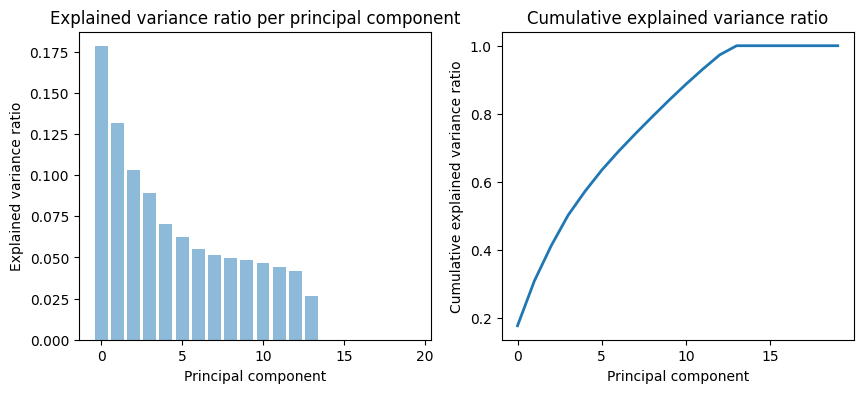

In [39]:
# insert code here
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit the PCA model
pca = PCA()
pca.fit(X_train_scaled)

# Calculate the explained variance ratio
evr = pca.explained_variance_ratio_

# Calculate the cumulative explained variance ratio
cvr = np.cumsum(evr)

# Plot the explained variance ratio and cumulative explained variance ratio
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].bar(range(len(evr)), evr, alpha=0.5)
ax[0].set_xlabel('Principal component')
ax[0].set_ylabel('Explained variance ratio')
ax[0].set_title('Explained variance ratio per principal component')

ax[1].plot(cvr, lw=2)
ax[1].set_xlabel('Principal component')
ax[1].set_ylabel('Cumulative explained variance ratio')
ax[1].set_title('Cumulative explained variance ratio')
plt.show()

Cumulative Explained Variance Ratio :

The x-axis represents the number of principal components and the y-axis represents the cumulative explained variance ratio.

The cumulative explained variance ratio shows the amount of variance in the data that can be explained by including that many principal components.

The elbow point in the graph indicates the number of components that should be included in the PCA model

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [36]:
# Insert code here
tar_counts = df['target'].value_counts()
print(tar_counts)

0.0    744
2.0    380
1.0    376
Name: target, dtype: int64


In evaluating a predictive model the metrics are followed as Accuracy, Precision, Recall, F1score, AUC-ROC

Here my choice in predicting the model I have chosen is Accuracy.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [16]:
# Insert code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Create and fit logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_training)

# Make predictions on test data
y_prediction_lr = lr.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_prediction_lr)
precision = precision_score(y_test,y_prediction_lr,average='weighted')
recall = recall_score(y_test, y_prediction_lr,average='weighted')

# Print confusion matrix and classification report
print('Confusion Matrix:\n', confusion_matrix(y_test, y_prediction_lr))
print('\nClassification Report:\n', classification_report(y_test, y_prediction_lr))
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Confusion Matrix:
 [[117  14  22]
 [ 22  44   8]
 [ 16   7  50]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       153
         1.0       0.68      0.59      0.63        74
         2.0       0.62      0.68      0.65        73

    accuracy                           0.70       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.70      0.70      0.70       300

Accuracy: 0.70
Precision: 0.70
Recall: 0.70


It is suitable to use the logistic regression model.  As a function of the input features, we are interested in modeling the probability of the positive class. The straightforward but effective approach of logistic regression can function effectively in a number of contexts and is simple to understand.

Accuracy of the above model is 0.70,
Precision is 0.70 and recall is also 0.70.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [40]:
# Insert code
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pl = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LogisticRegression())
             ])

params = {'model__C': [0.01, 0.1, 1, 10], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

pl_lr = GridSearchCV(pl, param_grid=params, scoring='accuracy', cv=10, refit=True)
pl_lr = pl_lr.fit(X_train, y_training)

pl_lr.best_estimator_



Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(C=0.1))])

In [41]:
print(f'Validation score: {pl_lr.best_score_:.2%}')
print(f'Test score: {pl_lr.score(X_test, y_test):.2%}')

Validation score: 71.17%
Test score: 68.67%


In [43]:
# Fit pipeline on training data
pl.fit(X_train, y_training)

# Make predictions on test data
y_pred = pl.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')

Accuracy: 70.33%
Precision: 70.40%
Recall: 70.33%


Using PCA model I have used GridSearch method and pipeline concept.

Using PCA model to create the Logistic regression model is having highest metrics when compare with the original logistic regression model such as the accuracy is slight higher than the original model i.e, 70.33%.

I prefer to choose the PCA model in creating the logistic regression model for this dataframe.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [44]:
# Insert code here
from sklearn.tree import DecisionTreeClassifier
# Create and fit decision tree model
decision = DecisionTreeClassifier()
decision.fit(X_train, y_training)

# Make predictions on test data
y_pred_d = decision.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_d)
precision = precision_score(y_test, y_pred_d,average='weighted')
recall = recall_score(y_test, y_pred_d,average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.66
Precision: 0.68
Recall: 0.66


Without using PCA model for the decision model the accuracy is 0.68. For the above logistic regression model the accuracy is 0.70

So, I can say that logistic regression model performs better than the decision tree model as i have chosen the Accuracy as the performance metrics for this dataset.

# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [32]:
# Insert code here
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

pipeline_Decision = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', DecisionTreeClassifier())
             ])

params = {'model__C': [0.01, 0.1, 1, 10], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

DTC = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
DTC = DTC.fit(X_train, y_training)

DTC.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(C=0.1))])

In [33]:
print(f'Validation score: {DTC.best_score_:.2%}')
print(f'Test score: {DTC.score(X_test, y_test):.2%}')

Validation score: 71.17%
Test score: 68.67%


In [38]:
# Fit pipeline on training data
pipeline_Decision.fit(X_train, y_training)

# Make predictions on test data
y_pred_DTC = pipeline_Decision.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_DTC)
precision = precision_score(y_test, y_pred_DTC,average='weighted')
recall = recall_score(y_test, y_pred_DTC,average='weighted')

print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')

Accuracy: 72.67%
Precision: 73.25%
Recall: 72.67%


By checking all the 3 performance metrics of the decision tree model and logistic regression model, the accuracy of the decision tree model is 72.67% where as the accuracy of logistic regression model is 70.33%.

In the end, the decision tree with PCA performs better than the original decision tree and the logistic regression model.